In [145]:
## Importing all the necessary modules.

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
## Downloading the data for ADANI Enterprises Limited

df = yf.download('TATAMOTORS.NS', start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [147]:
## Defining the shortTerm & longTerm Values to calculate the Moving Average.

shortTerm = 50
longTerm = 200


In [148]:

## Creating new columns holding the value of short term moving average & long term moving average in data frame.

df['MA-Short'] = df['Adj Close'].rolling(shortTerm).mean()
df['MA-Long'] = df['Adj Close'].rolling(longTerm).mean()


In [149]:
## Displaying the Data frame

df

,Open,High,Low,Close,Adj Close,Volume,MA-Short,MA-Long
Date,,,,,,,,
2019-01-01,173.500000,174.199997,171.300003,173.449997,173.449997,6715543,NaN,NaN
2019-01-02,170.600006,171.750000,168.000000,168.550003,168.550003,13410104,NaN,NaN
2019-01-03,169.000000,170.149994,165.100006,166.050003,166.050003,9321842,NaN,NaN
2019-01-04,169.000000,171.949997,168.500000,170.949997,170.949997,17650435,NaN,NaN
2019-01-07,173.199997,178.199997,173.199997,175.350006,175.350006,21438351,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-03-24,419.000000,420.549988,414.799988,416.500000,416.500000,6877960,427.804,426.43350
2023-03-27,416.000000,418.500000,410.250000,412.049988,412.049988,7433933,427.800,426.31550
2023-03-28,414.149994,414.500000,400.450012,401.600006,401.600006,9553659,427.602,426.18100


In [150]:

## As we can see from the data frame, there are some NaN values, Removing those NaN values.
df = df.dropna()


In [151]:
df

,Open,High,Low,Close,Adj Close,Volume,MA-Short,MA-Long
Date,,,,,,,,
2019-10-29,151.899994,175.500000,151.199997,172.449997,172.449997,184435614,124.054,162.40350
2019-10-30,175.000000,175.649994,166.550003,171.899994,171.899994,90759545,125.053,162.39575
2019-10-31,169.800003,179.649994,168.949997,177.699997,177.699997,81392641,126.189,162.44150
2019-11-01,175.199997,178.000000,172.399994,175.050003,175.050003,40613555,127.263,162.48650
2019-11-04,171.600006,178.449997,170.850006,172.199997,172.199997,40641411,128.291,162.49275
...,...,...,...,...,...,...,...,...
2023-03-24,419.000000,420.549988,414.799988,416.500000,416.500000,6877960,427.804,426.43350
2023-03-27,416.000000,418.500000,410.250000,412.049988,412.049988,7433933,427.800,426.31550
2023-03-28,414.149994,414.500000,400.450012,401.600006,401.600006,9553659,427.602,426.18100


In [152]:
## Only taking the required columns.

df = df[['Adj Close', 'MA-Short', 'MA-Long']]


In [153]:
df

,Adj Close,MA-Short,MA-Long
Date,,,
2019-10-29,172.449997,124.054,162.40350
2019-10-30,171.899994,125.053,162.39575
2019-10-31,177.699997,126.189,162.44150
2019-11-01,175.050003,127.263,162.48650
2019-11-04,172.199997,128.291,162.49275
...,...,...,...
2023-03-24,416.500000,427.804,426.43350
2023-03-27,412.049988,427.800,426.31550
2023-03-28,401.600006,427.602,426.18100


In [154]:

## Implementing the CORE logic of Strategy.

## - At a given day, if MA-Short is above MA-Long but not the day before -> Then BUY.
## - At a given day, if MA-Long is above MA-Short but not the day before -> Then SELL.

buyList = []
sellList = []

for i in range(len(df)):
    if i > 0 and df.iloc[i]['MA-Short'] > df.iloc[i]['MA-Long'] and df.iloc[i - 1]['MA-Short'] < df.iloc[i - 1]['MA-Long']:
        buyList.append(i)
    elif i > 0 and df.iloc[i]['MA-Long'] > df.iloc[i]['MA-Short'] and df.iloc[i - 1]['MA-Long'] < df.iloc[i - 1]['MA-Short']:
        sellList.append(i)


In [155]:
buyList

[39, 223, 715, 845]

In [156]:
sellList

[101, 634, 733]

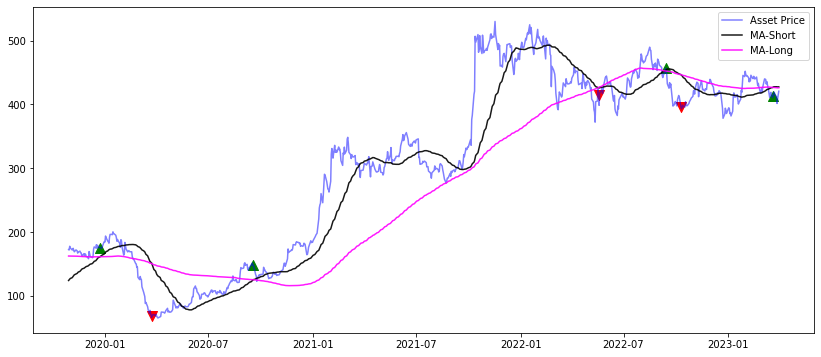

In [157]:
## Increasing the figure size
plt.figure(figsize = (14, 6))

## Plotting the Adjusted Close Price, MA-Short (Moving Average Short), MA-Long (Moving Average Long).
plt.plot(df['Adj Close'], label = 'Asset Price', c = 'blue', alpha = 0.5)
plt.plot(df['MA-Short'], label = 'MA-Short', c = 'k', alpha = 0.9)
plt.plot(df['MA-Long'], label = 'MA-Long', c = 'magenta', alpha = 0.9)

## Adding the marker on buying Index & selling Index.
plt.scatter(df.iloc[buyList].index, df.iloc[buyList]['Adj Close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[sellList].index, df.iloc[sellList]['Adj Close'], marker = 'v', color = 'r', s = 100)

plt.legend()
plt.show()
